# Importing libraries

In [2]:
from cmath import pi as pi
from math import cos as cos
from math import sin as sin

import matplotlib.pyplot as plt
import numpy as np

# FFT functions

In [3]:
def fft(input_data, input_length, direction=1):
    fft_result = __dif_fft(input_data, input_length, direction)

    if direction == -1:
        for i in range(input_length):
            fft_result[i] /= input_length

    return fft_result

def fft_shift(fft_result):
    length = len(fft_result)

    first_half = fft_result[0:int(length / 2)]
    second_half = first_half[:]
    first_half.reverse()
    shifted_result = first_half + second_half

    return shifted_result


def normalize_transform(fft_result, length):
    return list(np.divide(fft_result, length))


def __dif_fft(input_data, input_length, direction=1):
    if __is_power_of_two(input_length):
        length = input_length
        bits_in_length = int(np.log2(length))
    else:
        bits_in_length = np.log2(input_length)
        length = 1 << bits_in_length

    data = []
    for i in range(length):
        data.append(complex(input_data[i]))

    for ldm in range(bits_in_length, 0, -1):
        m = 2 ** ldm
        mh = int(m / 2)
        for k in range(mh):
            w = np.exp(direction * -2j * np.pi * k / m)
            for r in range(0, length, m):
                u = data[r + k]
                v = data[r + k + mh]

                data[r + k] = u + v
                data[r + k + mh] = (u - v) * w

    for i in range(length):
        j = __reverse_bits(i, bits_in_length)
        if j > i:
            temp = data[j]
            data[j] = data[i]
            data[i] = temp

    return data

def __is_power_of_two(n):
    return n > 1 and (n & (n - 1)) == 0

def __reverse_bits(n, bits_count):
    reversed_value = 0

    for i in range(bits_count):
        next_bit = n & 1
        n >>= 1

        reversed_value <<= 1
        reversed_value |= next_bit

    return reversed_value

# Conv&Corr functions

In [15]:
def fconvolve(first_seq, second_seq):
    length = len(first_seq)
    
    first_fft = fft(first_seq, length)
    second_fft = fft(second_seq, length)

    processed_first_fft = first_fft
    temp = np.multiply(processed_first_fft, second_fft)
    result = fft(temp, length, -1)

    return result


def fcorrelate(first_seq, second_seq):
    length = len(first_seq)
 
    first_fft = fft(first_seq, length)
    second_fft = fft(second_seq, length)

    processed_first_fft = first_fft
    processed_first_fft = np.conj(first_fft)
    
    temp = np.multiply(processed_first_fft, second_fft)
    result = fft(temp, length, -1)

    return result

def correlation_convolution(first_sequence, second_sequence, operation):
    length = len(first_sequence)
    result = []
    
    for i in range(length):
        temp = 0
        for j in range(length):
            k = (i + (j * operation)) % length
            temp += first_sequence[j] * second_sequence[k]

        result.append(temp)
    return result

# Initializing&Source plot

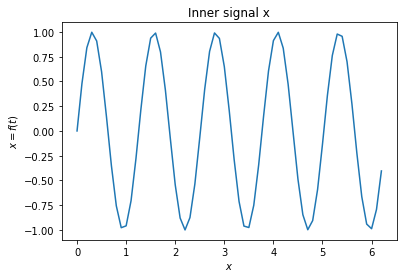

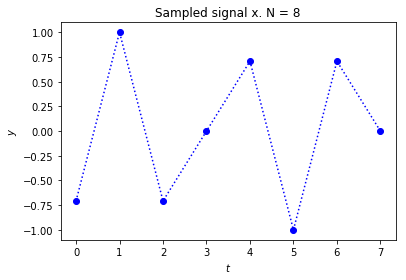

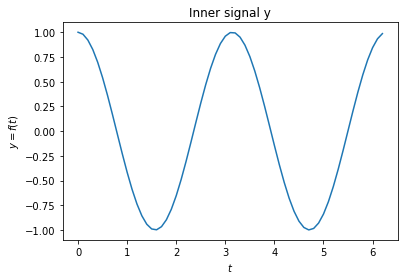

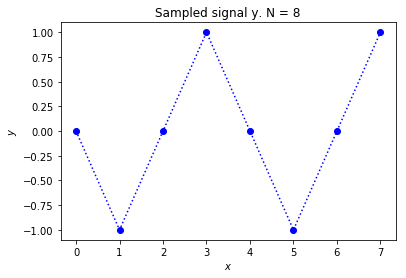

In [9]:
x_func = lambda t: sin(5 * t)
y_func = lambda t: cos(2 * t)
N = 8 # <-- replace on your N

def sampled(func, n, period=(2 * pi)):
    out = []
    for i in range(n):
        out.append(round(func(period * (i + 1) / n), 5))

    return out

x = sampled(x_func, N)
y = sampled(y_func, N)

x_range = np.arange(0, 2 * pi, 0.1)  # <--replace on your function
y_range = np.sin(5 * x_range)

plt.plot(x_range, y_range)
plt.title('Inner signal x')
plt.xlabel(r'$x$')
plt.ylabel(r'$x = f(t)$')
plt.show()
plt.close()

plt.plot(np.arange(N), x, "b:o")
plt.title('Sampled signal x. N = {0}'.format(N))
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.show()
plt.close()

x_range = np.arange(0, 2 * pi, 0.1)  # <--replace on your function
y_range = np.cos(2 * x_range)

plt.plot(x_range, y_range)
plt.title('Inner signal y')
plt.xlabel(r'$t$')
plt.ylabel(r'$y = f(t)$')
plt.show()
plt.close()

plt.plot(np.arange(N), y, "b:o")
plt.title('Sampled signal y. N = {0}'.format(N))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()
plt.close()

# Convolution

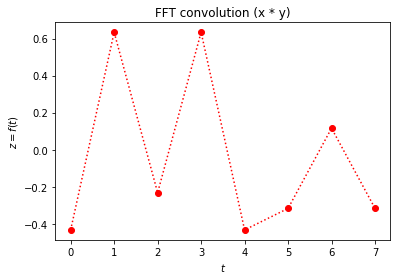

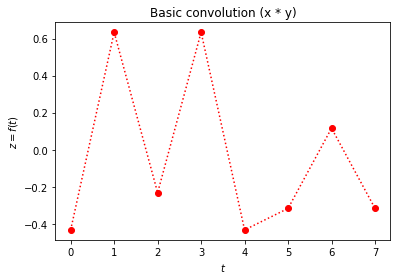

In [12]:
### convolve
arguments = np.arange(0, N) * np.pi / 6
function_values_1 = list(map(lambda x: np.sin(5 * x), arguments))
function_values_2 = list(map(lambda x: np.cos(2 * x), arguments))
plt.plot(np.arange(N), fconvolve(function_values_1, function_values_2), "r:o")
plt.title('FFT convolution (x * y)')
plt.xlabel(r'$t$')
plt.ylabel(r'$z = f(t)$')
plt.show()
plt.close()

plt.plot(np.arange(N), correlation_convolution(function_values_1, function_values_2, -1), "r:o")
plt.title('Basic convolution (x * y)')
plt.xlabel(r'$t$')
plt.ylabel(r'$z = f(t)$')
plt.show()
plt.close()

# Correlation

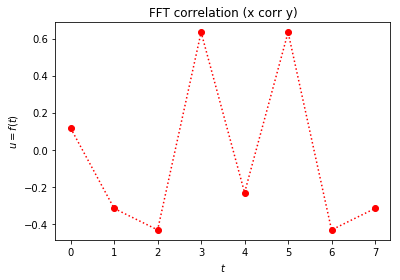

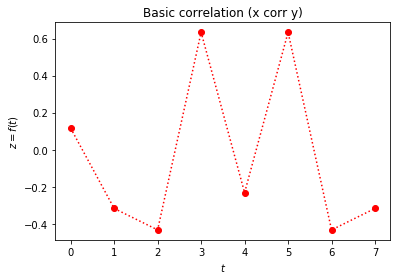

In [14]:
### correlation
plt.plot(np.arange(N), fcorrelate(function_values_1, function_values_2), "r:o")
plt.title('FFT correlation (x corr y)')
plt.xlabel(r'$t$')
plt.ylabel(r'$u = f(t)$')
plt.show()
plt.close()

plt.plot(np.arange(N), correlation_convolution(function_values_1, function_values_2, 1), "r:o")
plt.title('Basic correlation (x corr y)')
plt.xlabel(r'$t$')
plt.ylabel(r'$z = f(t)$')
plt.show()
plt.close()